# Clustering - Partitionnement de données - *Exercices Corrigés*
*PASS 2022-2023*

## Ressources

### Sites web

- [Matplotlib](https://matplotlib.org/)
- [Scikit learn](https://scikit-learn.org/stable/index.html)
- [NumPy](https://numpy.org/)

### Exercice TD : Construction d'un dendrogramme

Soient le jeu de données :
$$\mathcal{D} = \{x_1, x_2, x_3, x_4, x_5, x_6\}=\{(1,1),(1.5,0.5),(3,-4),(4,-4),(3,-3),(-2,5)\}$$
Construisez le dendrogramme du clustering hiérarchique de ce jeu de données en utilisant comme distance entre points la distance euclidienne et comme distance de linkage la distance SINGLE.

On pourra utiliser une fonction pour calculer les distances euclidiennes entre chaque paires de points.

### Exercice TP : Programmation du clustering hiérarchique

1. Programmez la fonction `cha(points, k, distanceFunction, linkageFunction)` permettant de produire les `k` clusters par agglomération hiérarchique utilisant la fonction de distance entre points passée en paramètre `distanceFunction` et la fonction de calcul des distances entre clusters passée en paramètre `linkageFunction`.

2. Vérifiez votre fonction sur le jeu de données de l'exercice précédent.

### Exercice TP : Comparer les effets de la fonction de distance inter-cluster

Étudiez l'effet du changement de la fonction de distance inter-cluster sur une classification hiérarchique.

Pour cela vous testerez les fonctions de distance inter-cluster [SINGLE] et [COMPLETE] sur les données contenues dans le fichier `datasets/dataset_hca_td1.json`.

Pour vous guider dans le code, vous trouverez ci-dessous une exemple de calcul et de représentation d'un clustering hiérarchique sur le jeux de données correspondant à l'exemple du cours utilisant les pakages python spécialisés dans ces tâches.

#### Exemple de code

Chargement des librairies:

In [29]:
import json
import numpy as np
from santini import plot_dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

Chargement des données à analyser:

In [30]:
with open('datasets/dataset_hca_cours.json', 'r') as json_file:
    D = np.array(json.load(json_file))

Réalisation de la classification:

In [31]:
model = AgglomerativeClustering(n_clusters=3, compute_distances=True, linkage="ward", affinity="euclidean")
clustering = model.fit(D)

Représentation du dendograme:

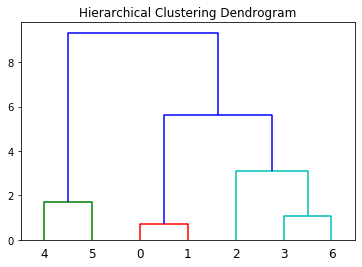

In [32]:
# setting distance_threshold=0 ensures we compute the full tree.
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode=None, color_threshold=4) 
plt.show()

Affichage du numéro du cluster auquel appartient chaque point du jeu de données à l'issue de la classification:

In [33]:
clustering.labels_

array([2, 2, 0, 0, 1, 1, 0])

#### Préparation du jeu de données

In [ ]:
import json

data = [
    [ 0, 1],
    [ 0.4,1.4],
    [ 1, 2],
    [ 2.1, 2],
    [ 2.7, 3],
    [ 3.1, 3.9]
]

with open('datasets/dataset_hca_td1.json', 'w') as json_file:
    json.dump(data, json_file)

#### Question 1

Importez le jeux de données depuis le fichier `datasets/dataset_hca_td1.json` et représentez les points dans un plan.

#### Question 2 :

Réalisez et affichez les classifications (clustering) pour les deux fonctions de distance inter-cluster [SINGLE] et [COMPLETE], avec un nombre de cluster égal à $k=3$ et représentez les dendogrames.

#### Question 3

Analysez les différences entre les aggrégations aobtenues avec les différentes fonctions de distance. 

## Exercice TD : Déroulement du KMeans

Soit le jeu de données : 
$$\mathcal{D}=\{(1),(3),(8),(10),(15),(17)\}$$
Déroulez l'algorithme du KMeans pour k=3 avec pour centroïdes initiaux :
$$\mathcal{M}_O=\left\{\mu _1,\mu _2,\mu _3\right\}=\{(0),(7),(11)\}$$

## Exercice TP : Programmation du k-mean

Programmez une version du k-mean qui stope les itérations lorsque la vrai convergence (les centroides ne changent plus) ou lorsqu'un nombre d'itérations maximal est atteint. Vous testerez ce programme sur un jeu de données simple (qui converge rapidement). Vous n'utiliserez pas les fonctions fournies par les packages scikitlearn ou autres.

### Question 1:

Définir une fonction `pos_nearest(pt, centers)` qui prend en paramètre un point `pt` et un tableau de points `centers` et qui retourne l'indice de position du point du tableau `centers` dont le point `pt` est le plus proche. 

### Question 2:

Définir une fonction `centroids( partition)` qui prend en paramètre une partition ( une tableau de clusters - ie. un tableau de tableaux de points) et qui retourne le tableau des barycentres des clusters.

### Question 3:

Définir une fonction `partition( dataset, centers)` qui prend en paramètre un jeu de données `dataset` et un tableau de centres de clusters `centers` et qui renvoie la partition des points du jeu de donnée en associant chaque point au cluster dont il est le plus proche du centre.

### Question 4:

Proposez une fonction `kmeans( dataset, k)` qui prend en paramètre un jeu de données `dataset` et `k` le nombre de clusters à former et retourne la classification des points après convergence (plus rien ne change).

### Question 5:

Testez votre programme sur le jeu de données du cours.

## Exercice TP : Application du k-mean

Le pakage `sklearn` permet d'exécuter le KMeans. Voici un exemple d'exécution sur l'exemple du cours avec représentation des clusters :

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


dataset = [[1, 6], [1, 7], [1, 8], [3, 3], [3, 4], [4, 2], [5, 2], [6, 3], [7, 3], [9, 6], [9, 7], [9, 8]]

classif = KMeans(n_clusters=3).fit_predict(dataset)

plt.xlim(0., 20.)
plt.ylim(0., 20.)
plt.grid()
plt.scatter([p[0] for p in dataset], [p[1] for p in dataset], s=20, c=classif)

plt.show()

### Question 1: Appliquer le KMeans aux jeux de données du cours 1
- `dataset_identification_clusters_4.json`
- `dataset_identification_clusters_1.json`
- `dataset_identification_clusters_2.json`
- `dataset_identification_clusters_3.json`

### Question 2:
Appliquer le KMeans aux jeux de données des iris (https://www.kaggle.com/datasets/uciml/iris) sur les 4 descripteurs quantitatifs.

Comparez le resultat obtenu par le KMeans avec k=3 à la classification exacte donnée dans la dernière colonne du fichier.